In [1]:
# Using sequential API to build, train, evaluate, and use classification MLP

In [2]:
import tensorflow as tf
from tensorflow import keras
tf.__version__


'2.3.0'

In [3]:
# Importing the dataset
"""
When loading using keras, every image is represented as 28x28
"""
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()


In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full.dtype

dtype('uint8')

In [6]:
# Creating validation and training data
# scale pixel intesities in range [0,1]
X_valid = X_train_full[:5000] / 255.0
X_train = X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]


In [7]:
class_names[y_train[0]]

'Coat'

In [8]:
# Classification MLP with two hidden layers
"""
#Create a sequential keras model. (Single stacked layers connected sequentially)
model = keras.models.Sequential()
#Flatten (input layer) converts input image to 1D array
model.add(keras.layers.Flatten(input_shape=[28,28]))
#Dense hidden layer with 300 neurons
model.add(keras.layers.Dense(300, activation="relu"))
#Dense hidden layer with 100 neurons
model.add(keras.layers.Dense(100, activation=keras.activations.relu))
#Output layer (one neuron per class). USe softmax because classes are exclusive
model.add(keras.layers.Dense(10, activation="softmax"))
"""
#Alternative way to create model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation = keras.activations.relu),
    keras.layers.Dense(100, activation=keras.activations.relu),
    keras.layers.Dense(10, activation="softmax")
])

In [9]:
model.summary()
#None means batch size can be anything

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.layers

In [11]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [12]:
# For hidden layers we can see and set the bias terms and weights
weights, biases = hidden1.get_weights()


In [13]:
# Weights are initialised randomly
weights

array([[ 0.02497323,  0.03279728, -0.06239281, ...,  0.0333278 ,
         0.0187783 , -0.02670225],
       [ 0.03707585,  0.01133914, -0.00451607, ...,  0.0043202 ,
        -0.06497974,  0.05104375],
       [ 0.0219151 , -0.06247948,  0.06117576, ..., -0.02123652,
         0.01197461,  0.04662006],
       ...,
       [-0.00649679,  0.00098506, -0.05301894, ..., -0.07355741,
         0.0484897 , -0.01778413],
       [-0.01763143, -0.02663738,  0.01936358, ..., -0.00737926,
         0.05352312,  0.05044635],
       [ 0.02594546,  0.04953761, -0.05152481, ...,  0.01665749,
        -0.03721987, -0.032897  ]], dtype=float32)

In [14]:
weights.shape

(784, 300)

In [15]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [16]:
biases.shape

(300,)

In [17]:
# Compile the model
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
             optimizer=keras.optimizers.SGD(lr=0.01),
             metrics=["accuracy"])
# We used sparce categorical crossentropy because we have sparse labels (target classes 0 to 9) and classes are exclusive
# We would use different loss functions depending on type of data
# Default value for loss rate (lr) is 0.01
# Since this is a classifier its usefull to measure "accuracy" during training

In [18]:
# Training the model
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))
# We can use validation_split=0.1 as param to validate on 10% data
# epochs = # of time learning algorithm will work

# Keras displays loss, accuracy after each epoch

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7156 - accuracy: 0.7687 - val_loss: 0.5389 - val_accuracy: 0.8138
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4885 - accuracy: 0.8298 - val_loss: 0.4575 - val_accuracy: 0.8486
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4438 - accuracy: 0.8433 - val_loss: 0.4311 - val_accuracy: 0.8508
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4162 - accuracy: 0.8546 - val_loss: 0.3962 - val_accuracy: 0.8672
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3966 - accuracy: 0.8614 - val_loss: 0.3852 - val_accuracy: 0.8704
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3814 - accuracy: 0.8669 - val_loss: 0.3985 - val_accuracy: 0.8550
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3680 - accuracy: 0.8709 - val_loss: 0.3559 - val_accuracy:

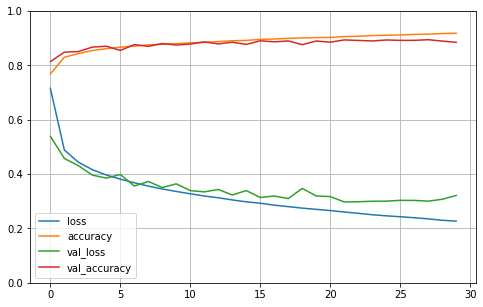

In [19]:
# fit() returns a History object with training params and list of epochs (history.epochs) 
# And dictionary with loss, ... at each epoch (history.history)
# We can plot this
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # Set vertical range [0, 1]
plt.show()
# Validation curves are close to training curves ==> not too much overfitting
# Using fit again starts where it left off

In [20]:
# Estimating generalization error
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 904us/step - loss: 81.5766 - accuracy: 0.8225


[81.5766372680664, 0.8224999904632568]

In [21]:
# Making predictions
X_new = X_test[:3]
y_prob = model.predict(X_new)
y_prob.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [22]:
import numpy as np
y_pred = model.predict_classes(X_new)
y_pred
np.array(class_names)[y_pred]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U11')